# MACHINE LEARNING COURSE PROJECT 
**GROUP NAME: GROUP 90 CLOSED <br>
GROUP MEMBERS: THIMIRA DULSHAN GUNATHILAKA MASTIYAGE DON - s3758709 <br>
               SAMALKA WEDARATNE NANAYAKKARA TALPE MERENCHIGE - s3758710**

## PREDICTING WHETHER A CUSTOMER WILL SUBSCRIBE A TERM DEPOSIT OR NOT

**DATA SOURCE:** <br> 
The Dataset was found from the UCI Machine Learning repository. The link to the actual dataset is referenced at the bottom of the report. The Dataset is called “Bank Marketing Dataset”. The Data folder consists of 4 different csv files in which two of these were updated versions with more features. From these two, we selected the csv file named “bank-additional.csv” which is a subset of its full version with only 4119 instances which is only a 10% of its full version due to our computational power limit as well as due to the requirements of this project. The dataset was then renamed according to project’s requirement. The bank dataset consists of 20 descriptive feature excluding the target feature which is denoted by ‘y’. A vague description of the features, their types and whether they have any missing values and what the target variable are mentioned in the text file that came with dataset.
<br> The following are the features.
 1. age (numeric)
 2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
 3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
 4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
 5. default: has credit in default? (categorical: "no","yes","unknown")
 6. housing: has housing loan? (categorical: "no","yes","unknown")
 7. loan: has personal loan? (categorical: "no","yes","unknown")
       related with the last contact of the current campaign:
 8. contact: contact communication type (categorical: "cellular","telephone") 
 9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
 11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
       other attributes:
 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 14. previous: number of contacts performed before this campaign and for this client (numeric)
 15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
       social and economic context attributes
 16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
 17. cons.price.idx: consumer price index - monthly indicator (numeric)     
 18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
 19. euribor3m: euribor 3 month rate - daily indicator (numeric)
 20. nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
 21. y - has the client subscribed a term deposit? (binary: "yes","no")


The following statement was also mentioned in the file: “Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.” 

# CONTENTS
1. OBJECTIVES
2. DATA PRE-PROCESSING
3. DATA EXPLORATION AND VISUALIZATION
4. PREDICTIVE MODELING 
   - METHODOLOGY
   - FEATURE SELECTION 
   - HYPER PARAMETER TUNING 
   - PERFORMANCE COMPARISON 
   - CRITIQUE 
5. SUMMARY AND CONCLUSION

# OBJECTIVES
There are several reasons for selecting this dataset. One of which being that the dataset comes from a very reputable machine learning source. Another major reason being the fact that we can understand the dataset in order to build a story out of it. Many other datasets we experienced had most of it’s information either encapsulated or were not in our interest fields. (Example medical or biological datasets). The following points discuss our goals and objectives for this project. 

- **The main goal is a binary classification goal** to predict if the client will subscribe a bank term deposit (variable y) or not.
- **Other goals for exploration purposes:**
   - Explore the relationship between different demographic data of clients (Age, Education level, and marital status) and whether there’s a relationship between having a personal loan or a house loan or and etc.  
   - Are most clients more optimistic or pessimistic (Consumer Confidence Index gives us an idea on this) 
   - The age distribution of clients who use Banking services which can help in which age category to approach more in future.
   - Is there any relationship between the Consumer price index and the age of the client?
   - Explore the relationship between Age and Marital Status of customers/clients? (Ex: Are more middle aged people married or single) 
   - Does the number of times a client is contacted (from the marketing campaign) effects in securing a term deposit with them? 


# DATA PRE PROCESSING

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import preprocessing

#displayig all columns in the data set
pd.set_option('display.max_columns',None)

In [2]:
Bank=pd.read_csv("s3758709_Data.csv",sep=";")
Bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


The dataset we obtained was already in a good format as per their description text file. They (original) have named all the missing values as "unknown" and adviced us(or anyone who uses the dataset) to either to take these "unknown" as a class variable or impute or drop them. Since dropping them would result in further decrease of the number of instances, we decided to impute them with mode as all these missing values are present in the categorical features. In terms of outliers, the only straightforward variable to check is the "age" variable in which you should have realistic ages and after checking the maximum and the minimum (later in summary statistics also it is shown) deemed there are no outliers for age. 

Checking the shape of the dataset to see whether everything is imported correctly

In [3]:
Bank.shape


(4119, 21)

Checking the column names.

In [4]:
Bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#Checking the data types 
Bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

The duration column has to be dropped as this shows the call duration of the bank and customer and has no effect to the target column. This was instructed in the dataset description provided with the dataset. 

In [6]:
Bank_df=Bank.drop(columns='duration')
Bank_df.shape

(4119, 20)

Checking for missing values just in case even though the source stated that all missing values are replaced with "unknown".

In [7]:
Bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Getting the value counts of the categorical variables to find potential data entry errors. (Ex: "Married" or "married" essential means the same thing)

In [8]:
Bank_df['marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [9]:
Bank_df['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [10]:
Bank_df['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

In [11]:
Bank_df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [12]:
Bank_df['housing'].value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [13]:
Bank_df['loan'].value_counts()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64

In [14]:
Bank_df['month'].value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64

In [15]:
Bank_df['contact'].value_counts()

cellular     2652
telephone    1467
Name: contact, dtype: int64

In [16]:
Bank_df['day_of_week'].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

In [17]:
Bank_df['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [18]:
Bank_df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

Imputing unknown with mode for Categorical variables

In [19]:
Bank_df['job'].replace('unknown','admin.',inplace=True)
Bank_df['job'].value_counts()

admin.           1051
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
Name: job, dtype: int64

In [20]:
Bank_df['marital'].replace('unknown','married',inplace=True)
Bank_df['marital'].value_counts()

married     2520
single      1153
divorced     446
Name: marital, dtype: int64

In [21]:
Bank_df['education'].replace('unknown','university.degree',inplace=True)
Bank_df['education'].value_counts()

university.degree      1431
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
illiterate                1
Name: education, dtype: int64

In [22]:
Bank_df['default'].replace('unknown','no',inplace=True)
Bank_df['default'].value_counts()

no     4118
yes       1
Name: default, dtype: int64

In [23]:
Bank_df['housing'].replace('unknown','yes',inplace=True)
Bank_df['housing'].value_counts()

yes    2280
no     1839
Name: housing, dtype: int64

In [24]:
Bank_df['loan'].replace('unknown','no',inplace=True)
Bank_df['loan'].value_counts()

no     3454
yes     665
Name: loan, dtype: int64

Dropping the default column as it's almost constant throughout the dataset with only 1 observaion has a different value than the rest. The resulting dataset which contains 19 variables in which variable y is the target and the rest will be used for predictive modeling later. 

In [25]:
Bank_df=Bank_df.drop(columns='default')
Bank_df.shape

(4119, 19)

In [26]:
Bank_df_sub=Bank_df.copy()

In [27]:
Bank_df.to_csv('beforeEncode.csv',index=False)

# DATA EXPLORATION & VISUALIZATION

We will be using the matplotlib and seaborn for visualization and statsmodels and pasy for statistics. 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
df=Bank_df.copy()
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,yes,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## SUMMARY STATISTICS

In this section we will take a first glance at the descriptive features of the dataset by their summary statistics. 

In [29]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features of Type Integer</b>'))
df.describe(include='int64')

,age,campaign,pdays,previous
count,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,960.422190,0.190337
std,10.313362,2.568159,191.922786,0.541788
min,18.000000,1.000000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000
max,88.000000,35.000000,999.000000,6.000000


In [30]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of continuous features of Type Float</b>'))
df.describe(include='float64')

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,1.563114,0.579349,4.594578,1.733591,73.667904
min,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
display(HTML('<b>Table 3: Summary of categorical features</b>'))
df.describe(include='object')

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,1051,2520,1431,2280,3454,2652,1378,860,3523,3668


## DATA VISUALIZATION

In this section we use different visualization techniques such as boxplots, scatterplots, bar plots and histograms to visualize and explore the dataset. This section is subdivided to 3 parts focusing on Single variable, Dual Variable and Tri-variable plots. 

### UNIVARIATE VISUALIZATION

**Barplot for Marital status**

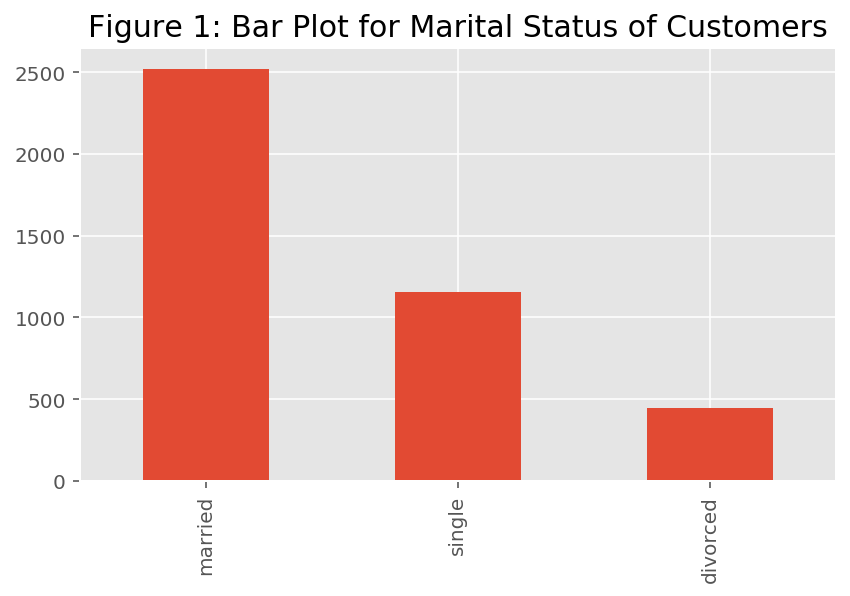

In [32]:
ax = df['marital'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Plot for Marital Status of Customers', fontsize = 15)
plt.show();

Most of the Customers are married individuals according to the barplot. 

**Box plot for Consumer Confidence Index**

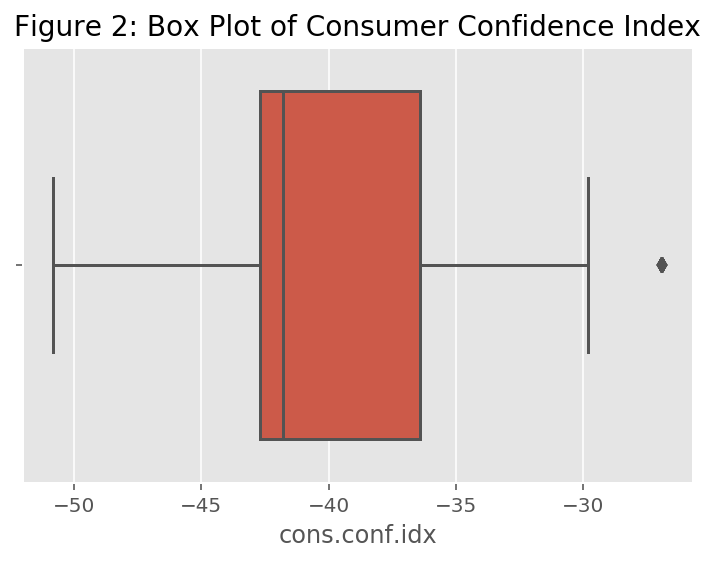

In [33]:
sns.boxplot(df['cons.conf.idx']).set_title('Figure 2: Box Plot of Consumer Confidence Index', fontsize = 14)
plt.show();

This continuous variable, the Consumer Confidence Index is a monthly indicator that shows how optimistic or not a customer is depending on how he or she spends or saves money. Different countries have different factors contributing to this factor. In this case it seems that customers are not that optimistic about the economy. From a statistical point of view the Box plot shows highly right skewed data, so best to keep that in mind when we deal with predictive modeling.

**Bar plot for the Outcome of the Previous Marketing Campaign with the customers.**

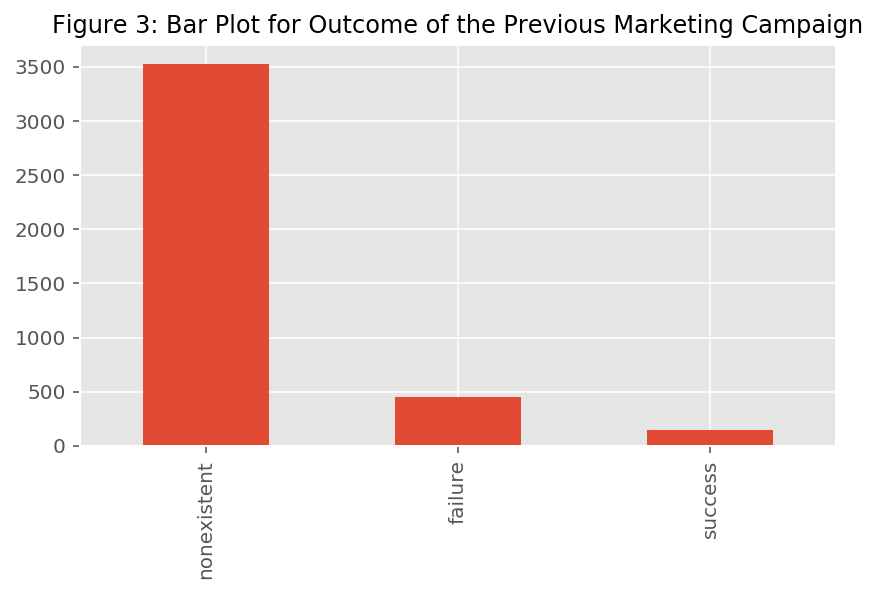

In [34]:
ax = df['poutcome'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 3: Bar Plot for Outcome of the Previous Marketing Campaign', fontsize = 12)
plt.show();

The plot clearly shows that most of the customers did not experience a previous marketing campaign. However Sucesses are quite low when compared to the failures from the people who have experienced a campaign before. This gives us some sort of idea as to maybe the Bank should try different approaches in terms of holding marketing campaigns in future. 

**Histogram with Kernel Density Estimate for Age**

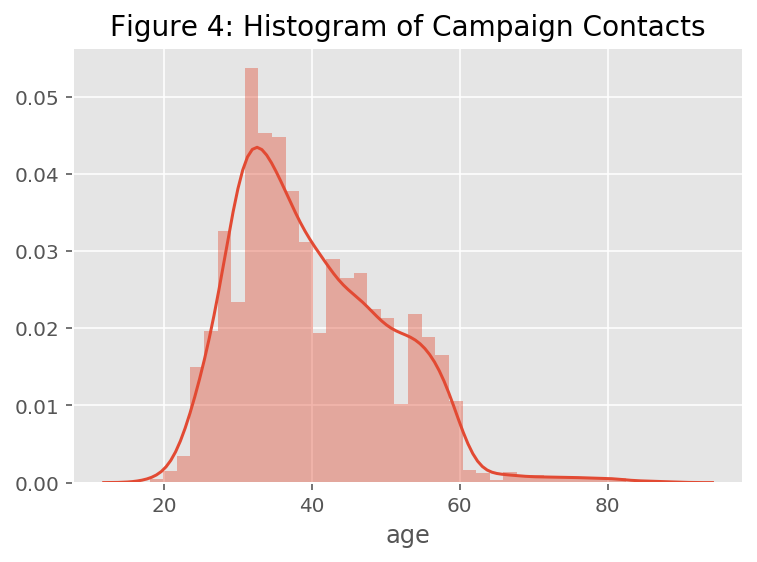

In [35]:
# get a histogram of age with kernel density estimate
sns.distplot(df['age'], kde = True).set_title('Figure 4: Histogram of Campaign Contacts', fontsize = 14)
plt.show();


The plot shows us that the Age variable is a little right skewed. Most of the customers or clients are in middle ages. So when the Bank do their next Marketing Campaign if they approach it in a suitable way that would attract the middle aged customers that might give them a positive outcome. 

### TWO VARIABLE VISUALIZATION

**Scatterplot for Consumer Price Index and Age**

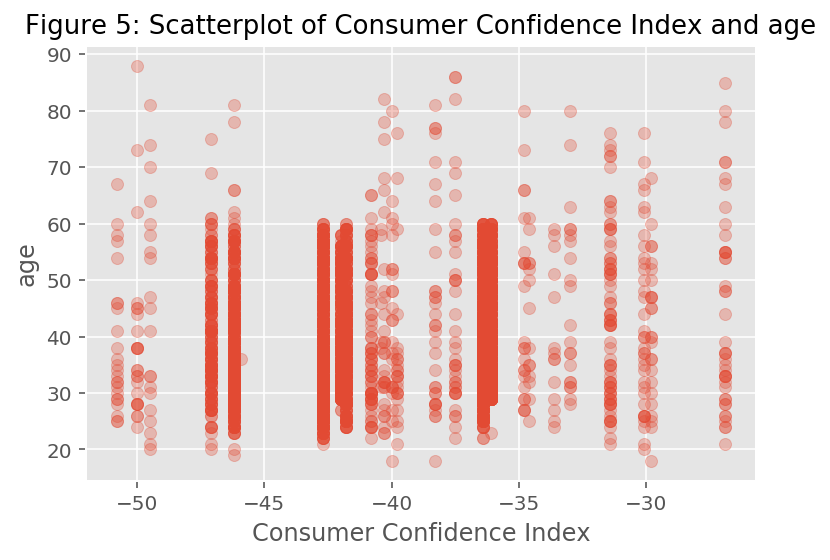

In [36]:
cons = df['cons.conf.idx']

# get a scatter plot
plt.scatter(cons, df['age'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of Consumer Confidence Index and age', fontsize = 13)
plt.xlabel('Consumer Confidence Index')
plt.ylabel('age')
plt.show();

There seems to be no correlation or relationship between the two continuous variables, consumer confidence index and Age of customers. 

**Boxplot for Age by Marital Status**

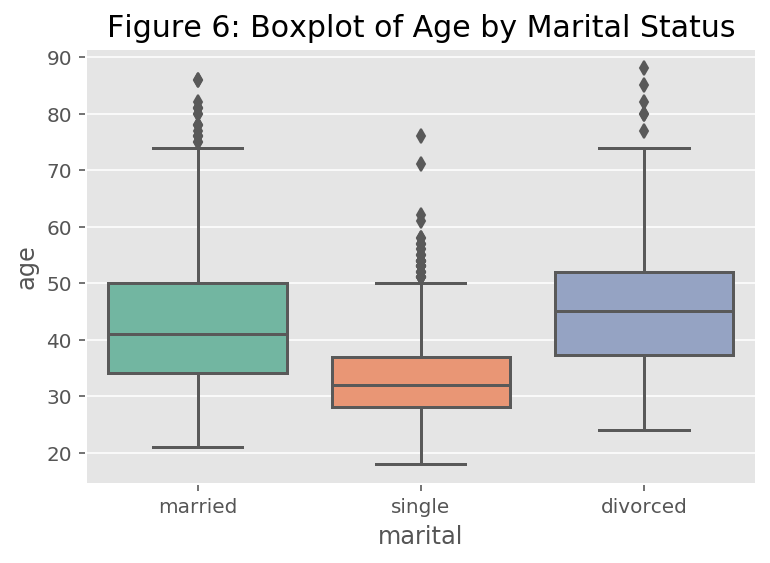

In [37]:
sns.boxplot(df['marital'], df['age'],palette="Set2");
plt.title('Figure 6: Boxplot of Age by Marital Status', fontsize = 15)
plt.show();

From the above plot we can see that Single customers are quite younger (concentrated below mid thirties) in general compared to the Married or Divorced customers. Married customers and Divorced customers seems to be in mostly the same age group when comparing with the Singles. 

**Boxplot for Age and Education**

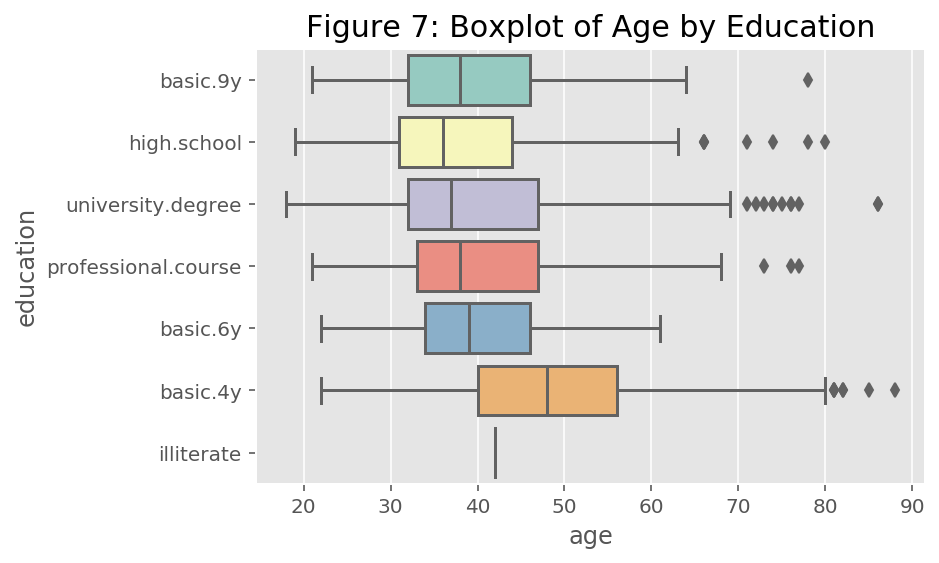

In [38]:
sns.boxplot(df['age'],df['education'],palette="Set3");
plt.title('Figure 7: Boxplot of Age by Education',fontsize = 15)
plt.show();

We can see that Most of the Education types vs age are similar in distribution except for Illiterate and Basic 4 Year. There is not enough Illiterate customers to plot a box plot, showing that we should expect almost every customer who has some sort of education background. Also a lot of customers who have completed only upto 4th Grade lies between the ages of 40 to 57. 

### THREE VARIABLE VISUALIZATION

**Scatter Plot for Campaign Contacts by Age & the presence of a Housing loan**

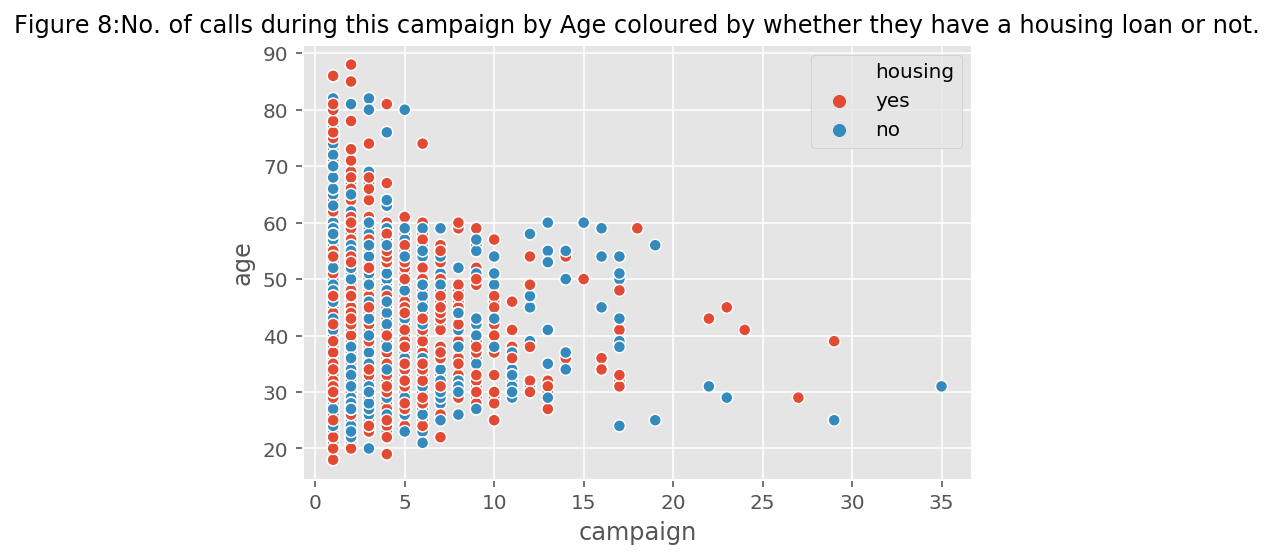

In [39]:
sns.scatterplot(df['campaign'], df['age'], hue = df['housing'])
plt.title('Figure 8:No. of calls during this campaign by Age coloured by whether they have a housing loan or not.', fontsize = 12);
plt.legend(loc = 'upper right')
plt.show();

There is no pattern whether a client has been contacted regarding this marketing campaign depending on whether they have a housing loan or not or depending on age. From business perspective it seems like a good thing to contact as much clients as possible disregarding their previous loans or mortgages. The scatterplot is more concentrated to the left side of the plot showing that an insane number of contacts/calls haven't been placed with only a few clients have been contacted for over 20 times. 

**BoxPlot for Age Broken down by Marital Status and Having a Personal Loan**

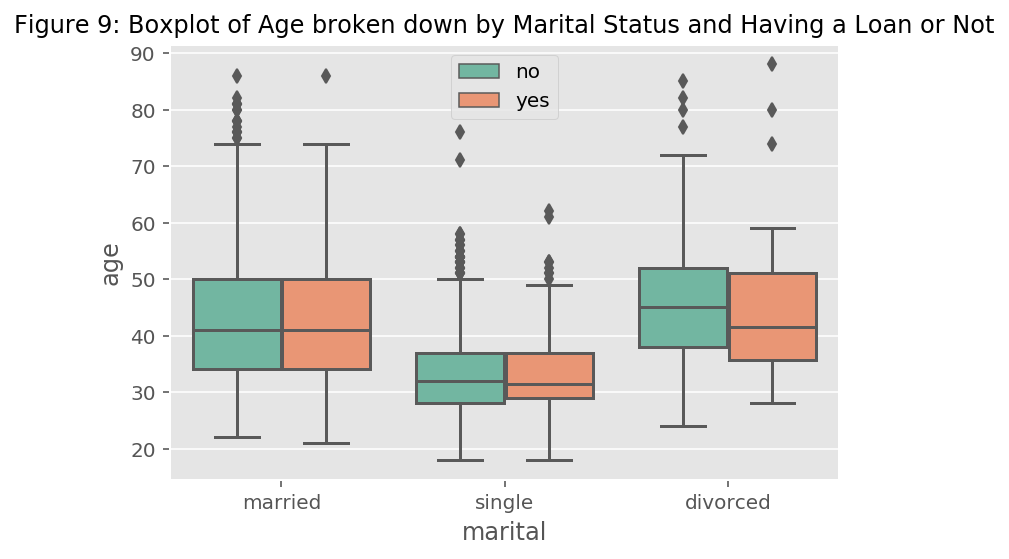

In [40]:
sns.boxplot(df['marital'], df['age'], 
            hue = df['loan'],palette='Set2')
plt.title('Figure 9: Boxplot of Age broken down by Marital Status and Having a Loan or Not', fontsize = 12)
plt.legend(loc = 'upper center')
plt.show();

Boxplots for Married Customers having a loan or not respective to their Age seems extremely similar except for some outliers presented in the boxplot for Married with No loan. They are slightly right skewed as well. In general it is hard to come to a strong conclusion soley based on the above boxplots. 

**Scatter Plot for Campaign Contacts by Age & whether the client Subscribed a Term Deposit**

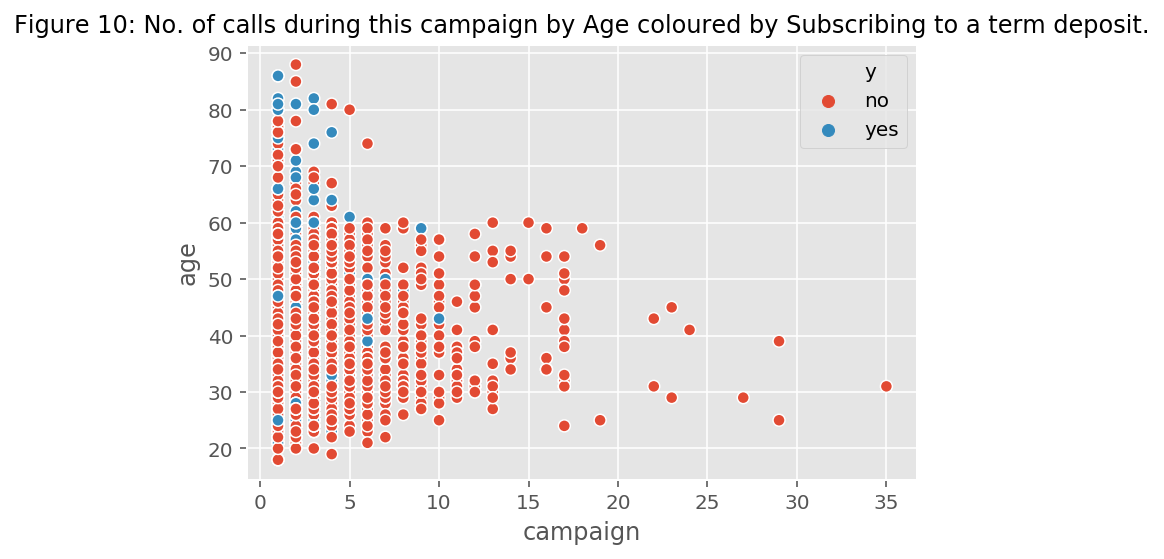

In [41]:
sns.scatterplot(df['campaign'], df['age'], hue = df['y'])
plt.title('Figure 10: No. of calls during this campaign by Age coloured by Subscribing to a term deposit.', fontsize = 12);
plt.legend(loc = 'upper right')
plt.show();

It seems like somewhat older people above 60 years of age are the best customers when considering their subscription towards a term deposit. (This is also our target variable in Predictive Modeling). A key fact that we can notice is that the clients who have said yes to a subscription haven't received that many calls before considering to subscribe. On the otherhand even if you contact some customers for more than 20 times they still may not want to subscribe to a term deposit. After all personal choice is also one major factor in cases like this in which we should respect even though we try to predict the outcomes based on data of our clients. 

# PREDICTIVE MODELING 

## OVERVIEW OF METHODOLOGY

Our Predictive Modeling goal is a **Binary Classification** problem. Therefore we have decided to try out 4 different classifiers that are commonly used for Binary Classification as follows. 
- K Nearest Neighbours (KNN) 
- Decision Tree (DT) 
- Naive Bayes (NB) 
- Random Forest (RF) 

We start by pre processing our dataset to a format that is suitable for fitting models. Most of the basic pre processing tasks such as handling missing values, sanity checks, dropping unnecessary columns were done at the very begining for the purpose of exploration. Apart from that, we did additional pre processing, focused mainly on Machine Learning such as Discretizing the numeric **age** feature, Integer encoding ordinal descriptive features **age** and **education**. Then making two datasets Bank_df_target and Bank_df_data for the target and the other features. Then we go ahead with one-hot-encoding the nominal variables that are in the Bank_df_data. After this, we result in 45 features. <br> 

For feature selection we use Random Forest Importance method(RFI). Initally, we use 30 features in the RFI for understanding purposes. Later we incoperate the RFI to Pipelines for efficient presentation. We split the dataset to train and test using stratification strategy with 70:30 ratio which resulted in  2883 instances for train set and 1236 for test. We use this training set in our hyperparameter tuning process. As mentioned earlier pipelines are used for easier handling of the problem and therefore we incoperate the RFI to the pipeline along with hyperparameter searches. Stratified cross validation is used as our data are highly imbalanced. We fine tune the hyperparameters based of the Area Under the ROC Curve (AUC). Parrellel processing is also done using -2 cores. Classifiers with the adequate hyperparameters are found using Gridsearch for KNN, DT and RF while a randomized search was done for NB. (Due to time limitation issue) Next we fit the test data to our models using Stratified 10 fold cross validation. 

Finally we compare the different classifiers using paired t-tests to identify a statistical significant difference is there between the performance of classifiers. We take the full classification report to understand the performances more.



### DATA PRE PROCESSING CONTINUED (FOCUSED FOR ML)

Discretizing Numeric Features - age

In [42]:
Bank_df_sub['age'] = pd.qcut(Bank_df_sub['age'], q=3, 
                                     labels=['young', 'middle', 'old'])

In [43]:
Bank_df_sub['age'].value_counts()

young     1479
middle    1327
old       1313
Name: age, dtype: int64

Integer encodeing ordinal fetures. age and education

In [44]:
#Age
level_mapping_age = {'young': 0, 'middle': 1, 'old': 2}
Bank_df_sub['age'] = Bank_df_sub['age'].replace(level_mapping_age)

In [45]:
#Education
level_mapping_education={'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'professional.course':5,'university.degree':6}
Bank_df_sub['education'] = Bank_df_sub['education'].replace(level_mapping_education)

Dropping the target

In [46]:
#dropping target variable
Bank_df_data = Bank_df_sub.drop(columns='y')
Bank_df_target = Bank_df_sub['y']

In [47]:
Bank_df_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,blue-collar,married,3,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,1,services,single,4,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,0,services,married,4,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,1,services,married,3,yes,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,2,admin.,married,6,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


One-hot encoding for nominal variables 

In [48]:
Bank_df_data['job'] = Bank_df_data['job'].astype(object)
Bank_df_data['marital'] = Bank_df_data['marital'].astype(object)
Bank_df_data['housing'] = Bank_df_data['housing'].astype(object)
Bank_df_data['loan'] = Bank_df_data['loan'].astype(object)
Bank_df_data['contact'] = Bank_df_data['contact'].astype(object)
Bank_df_data['month'] = Bank_df_data['month'].astype(object)
Bank_df_data['day_of_week'] = Bank_df_data['day_of_week'].astype(object)
Bank_df_data['poutcome'] = Bank_df_data['poutcome'].astype(object)

In [49]:
categorical_cols = Bank_df_data.columns[Bank_df_data.dtypes==object].tolist()

for col in categorical_cols:
    n = len(Bank_df_data[col].unique())
    if (n == 2):
        Bank_df_data[col] = pd.get_dummies(Bank_df_data[col], drop_first=True)
        
Bank_df_data = pd.get_dummies(Bank_df_data)

In [50]:
Bank_df_data.head()

,age,education,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,3,1,0,0,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,4,0,0,1,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,4,1,0,1,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,3,1,0,1,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,2,6,1,0,0,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [51]:
Bank_df_data.shape

(4119, 45)

In [52]:
Bank_df_data.columns

Index(['age', 'education', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

#### ENCODING THE TARGET 
As you can see the target is highly imbalanced with only 451 with Yes and 3668 with No. 

In [53]:
np.unique(Bank_df_target, return_counts=True)

(array(['no', 'yes'], dtype=object), array([3668,  451], dtype=int64))

In [54]:
target = preprocessing.LabelEncoder().fit_transform(Bank_df_target)

In [55]:
np.unique(target, return_counts=True)

(array([0, 1]), array([3668,  451], dtype=int64))

#### SCALING THE DATA 
It's important to use an appropriate scaler on the descriptive features whenever we try to fit to a model as it's essential for most algorithms. Here the minmax scaler is used. This will be used in the next part of the report. 

In [56]:
Bank_df_data_scaler = preprocessing.MinMaxScaler().fit(Bank_df_data)
Data = Bank_df_data_scaler.transform(Bank_df_data)

## Feature selection using random forest importance (RFI)


This is just to understand about the features that we are dealing with in future. Later RFI will be used in pipelines for efficient presentation. We'll take a look at the most relevant 30 features and how they contribute towards the prediction. Note that RFI is just one method of feature selection and we will only try this due to our limitations. Other methods include F-score, Mutual Information and Wrapper methods.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection as fs

In [58]:
num_features1=30

In [59]:
#?RandomForestClassifier

#### for 30 features

In [60]:
model_rfi = RandomForestClassifier(n_estimators=100,random_state=9)
model_rfi.fit(Data,target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features1]

best_features_rfi = Bank_df_data.columns[fs_indices_rfi].values
best_features_rfi

array(['euribor3m', 'campaign', 'education', 'nr.employed', 'age',
       'pdays', 'housing', 'cons.conf.idx', 'cons.price.idx',
       'poutcome_success', 'job_admin.', 'emp.var.rate', 'loan',
       'marital_married', 'previous', 'marital_single', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_mon', 'job_technician',
       'day_of_week_wed', 'day_of_week_fri', 'job_blue-collar', 'contact',
       'marital_divorced', 'job_retired', 'job_management',
       'poutcome_nonexistent', 'job_services', 'poutcome_failure'],
      dtype=object)

In [61]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.14313416, 0.07831125, 0.07430109, 0.05719672, 0.05216937,
       0.03993744, 0.03749105, 0.03534706, 0.03256181, 0.02832219,
       0.02506869, 0.02506012, 0.02251662, 0.02214334, 0.02062065,
       0.02006401, 0.01917794, 0.01864449, 0.01835912, 0.0177286 ,
       0.01731091, 0.01715764, 0.01573853, 0.0154998 , 0.01303864,
       0.01268703, 0.01225453, 0.01116612, 0.01066514, 0.01048036])

In [62]:
import altair as alt

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.75, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [63]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'green')

alt.Chart(...)

### Train - Test Splitting
Splitting the data using stratification (to account for the class imbalance problem we mentioned earlier) in 70:30 ratio for Train and Test respectively.

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
print(Data.shape)
print(target.shape)

(4119, 45)
(4119,)


In [66]:
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    stratify=target,
                                                    test_size = 0.3, 
                                                    random_state=7
                                                   )

print(D_train.shape)
print(D_test.shape)

(2883, 45)
(1236, 45)


### Model Evaluation Strategy

Using 5 fold Stratified cross validation method withot any repetitions for shorter times for hyperparameters tuning.

In [67]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5,random_state=9)

## HYPER PARAMETER TUNNING

### K-NEAREST NEIGHBOUR (KNN)
The hyperparameters for KNN are: 
- Number of Neighbours (k) 
- Distance Metrics (p) <br>
Pipeline Methodology will be used here. Feature Selection done by RFI with 100 estimators embedded to the pipeline. 


In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100,random_state=4)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2,3,5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [70]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   27.0s finished


In [71]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 15, 'knn__p': 2, 'rfi_fs__n_features_': 20}

In [72]:
gs_pipe_KNN.best_score_

0.7235060427959812

According to above, the best parameter combination is 15 neighbors with Eucledien distance using 20 features. However let's take a look at other combination of parameters as well.

In [73]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [74]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
40,0.723518,0.018186,0.752174,0.705359,15.0,2.0,20.0
49,0.721226,0.016542,0.743649,0.701501,20.0,1.0,20.0
37,0.720289,0.014880,0.737415,0.693024,15.0,1.0,20.0
52,0.719930,0.011988,0.736100,0.702729,20.0,2.0,20.0
57,0.719100,0.031235,0.749120,0.660695,20.0,5.0,10.0


The results show not much of a difference, 4 combinations show 20 features and the fifth best combination uses only 10 features which can be a good thing if we don't want to deal with many features. 

In [75]:
import altair as alt

results_KNN_20_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_KNN_20_features, 
          title='KNN Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

The above plot shows the KNN performance using 20 features. 

## Naive Bayes (NB)

This section is about Naive Bayes Classifier. The hyperparameter that we focus here is called **var_smoothing**. Here we do a randomized search (to save time) over the logspace as the default value for var_smoothing is -9th power of 10. 


In [76]:
from sklearn.preprocessing import PowerTransformer
D_train_transformed = PowerTransformer().fit_transform(D_train)

In [77]:
#?GaussianNB

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(999)
pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-5, num=200)}

n_iter_search = 30
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(D_train_transformed, t_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:    7.6s finished


In [79]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 10, 'nb__var_smoothing': 0.014649713983072863}

In [80]:
gs_pipe_NB.best_score_

0.7466325754405028

The best combination is given with only 10 features and the best score comes to 74% which seems better than KNN at first glance. 

In [81]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
7,0.746628,0.014073,0.768591,0.729478,10.0,0.014650
25,0.746594,0.014074,0.768575,0.729308,10.0,0.000065
6,0.746594,0.014074,0.768575,0.729308,10.0,0.000037
21,0.746585,0.014082,0.768575,0.729292,10.0,0.000161
19,0.746576,0.014046,0.768467,0.729308,10.0,0.000793


In [82]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

## Decision Tree (DT) 
The decision tree classifier we build here is based on the split criterion gini index. We shall use 10, 20 or all the features to come up with combinations for different 
- maximum depth 
- minimum sample split


In [83]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT2 = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT2 = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5,10],
                  'dt__min_samples_split': [5, 50, 100, 150,180]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT2, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(D_train, t_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   15.3s finished


In [84]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 100, 'rfi_fs__n_features_': 45}

In [85]:
gs_pipe_DT2.best_score_

0.7583459039696969

In [86]:
results_DT2 = get_search_results(gs_pipe_DT2)

results_DT2_45_features = results_DT2[results_DT2['rfi_fs__n_features_'] == 45.0]

alt.Chart(results_DT2_45_features, 
          title='DT Performance Comparison with 45 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

## RANDOM FOREST

In this section we use the Random Forest Classifier with 100 estimators using gini or entropy split criterion. Random Forest is like the bigger version of a Decision Tree.

In [87]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', RandomForestClassifier(n_estimators=100, random_state=111))])

params_pipe_RF = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__criterion': ['gini','entropy'],
                  'dt__max_depth': [1,3, 4,10],
                  'dt__min_samples_split': [2, 5,10,50,100,150]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_RF.fit(D_train, t_train);

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-2)]: Done 720 out of 720 | elapsed:  1.0min finished


In [88]:
gs_pipe_RF.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 4,
 'dt__min_samples_split': 100,
 'rfi_fs__n_features_': 45}

In [89]:
gs_pipe_RF.best_score_

0.771394038796281

In [90]:
results_RF = get_search_results(gs_pipe_RF)

results_RF_45_features = results_RF[results_RF['rfi_fs__n_features_'] == 45.0]

alt.Chart(results_RF_45_features, 
          title='RF Performance Comparison with 45 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

In [91]:
#?RandomForestClassifier

In [92]:
#?KNeighborsClassifier

## PERFORMANCE COMPARISON
Here we focus on comparing the different classifiers we used earlier using our reserved test data with their best hyperparameters. The Scoring system is roc_auc as mentioned earlier as well. 

In [93]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=8)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.6972728172728173

In [94]:
Data_transformed = PowerTransformer().fit_transform(D_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_transformed,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.7575758925758926

In [95]:
cv_results_DT2 = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT2.mean()

0.7507393057393059

In [96]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.781944541944542

We compare different combinations of classifiers in pairs by using paired t tests. The combinations we use are: 
- KNN vs NB
- KNN vs DT 
- KNN vs RF
- DT vs NB
- DT vs RF 
- NB vs RF 

In [97]:
from scipy import stats

print('----------------------------------------------------')
print('T test Results for KNN and NB')
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print('----------------------------------------------------')
print('T test Results for KNN and DT')
print(stats.ttest_rel(cv_results_KNN, cv_results_DT2))
print('----------------------------------------------------')
print('T test Results for KNN and RF')
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print('----------------------------------------------------')
print('T test Results for DT and NB')
print(stats.ttest_rel(cv_results_DT2, cv_results_NB))
print('----------------------------------------------------')
print('T test Results for DT and RF')
print(stats.ttest_rel(cv_results_DT2, cv_results_RF))
print('----------------------------------------------------')
print('T test Results for NB and RF')
print(stats.ttest_rel(cv_results_NB, cv_results_RF))


----------------------------------------------------
T test Results for KNN and NB
Ttest_relResult(statistic=-2.9234616401142417, pvalue=0.016936171388041443)
----------------------------------------------------
T test Results for KNN and DT
Ttest_relResult(statistic=-2.340347070921001, pvalue=0.04399526071698226)
----------------------------------------------------
T test Results for KNN and RF
Ttest_relResult(statistic=-3.4378868277322843, pvalue=0.007415230330069885)
----------------------------------------------------
T test Results for DT and NB
Ttest_relResult(statistic=-0.39234134645945334, pvalue=0.7039355204738371)
----------------------------------------------------
T test Results for DT and RF
Ttest_relResult(statistic=-1.676911828060038, pvalue=0.12787418403124584)
----------------------------------------------------
T test Results for NB and RF
Ttest_relResult(statistic=-1.846418657906592, pvalue=0.09790721969410972)


Note: A p-value of less than 0.05 in a 95% Confidence Interval means that there is a Statistical Significance between the two classifiers subjected to paired t-test. 
<br> Therefore the above values shows that:
- There is a significant difference in using  NB over KNN (NB yields high prediction power than KNN even statistically) 
- There is a significant difference in using  DT over KNN 
- There is a significant difference in using RF over KNN
- There is no significant difference in using either DT or NB 
- There is no significant difference in using either DT or RF
- There is no significant difference in using either NB or RF 



#### Classification report
In this section we take a look at other metrices apart from AUC_ROC which we used to tune our parameters such as 
- Accuracy
- Precision
- Recall
- F1 Score 
- Confusion Matrix


In [98]:
pred_KNN = gs_pipe_KNN.predict(D_test)

In [99]:
Data_transformed = PowerTransformer().fit_transform(D_test)
pred_NB = gs_pipe_NB.predict(Data_transformed)

In [100]:
pred_DT = gs_pipe_DT2.predict(D_test)

In [101]:
pred_RF = gs_pipe_RF.predict(D_test)

In [102]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(t_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(t_test, pred_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1101
           1       0.78      0.23      0.35       135

    accuracy                           0.91      1236
   macro avg       0.84      0.61      0.65      1236
weighted avg       0.90      0.91      0.89      1236


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1101
           1       0.43      0.32      0.37       135

    accuracy                           0.88      1236
   macro avg       0.68      0.63      0.65      1236
weighted avg       0.87      0.88      0.87      1236


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1101
           1       0.61      0.30      0.40       135

    accuracy                           0.90      1236
  

In [103]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[1092    9]
 [ 104   31]]

Confusion matrix for Naive Bayes
[[1045   56]
 [  92   43]]

Confusion matrix for Decision Tree
[[1075   26]
 [  95   40]]

Confusion matrix for Random Forest
[[1094    7]
 [ 107   28]]


Based on the above metrices we can chose which model we use, this depend on the context of the targeted problem. For example the Random Forest classifier in this case yields a high precision but a low recall for the positive class (Yes for subscribing to a term deposit) which essentially means the model can’t detect the class well but is highly trustable when it does. In some instances the bank might be more interested in the customers who would say "No" so that the Bank can contact these customers for a different financial service. So just because an algorithm gives a very high prediction capability doesn't mean that it's the best in every scenario. (An algorithm that can detect the most profitable opportunites for a business but will also catch potential losses as opportunities which might ultimately result in more bad than good)

## CRITIQUE

There were several limitations that we experienced throughout the entire project. One being the medicore availability of time and commitment and the computational power we had to deal with. Therefore we had to stick to less demanding approaches like not using Wrapper techniques for feature selection which would have been ideal as different models work differently and it's only fair that they get a chance to choose their features specifically for them. The dataset we used was the 10% of the original dataset which was already in a different csv uploaded by the source site. It was a highly imbalanced set with fewer positive class instances. If we used the full dataset it would have been more accurate and reasonable and we would have more options to deal with. Also, though we understood the dataset and the target problem, we were unable to go into an in depth analysis and understanding which would have benifited us in interpreting. For example, some more features which has no connection to the outcome could have been dropped before introducing to the model if we were 100% on what the features meant because sometimes it can make a difference. We also performed a power transformation on all the features including the dummy features in Naive Bayes which ultimately effects performance. 
The Random Forest Classifier appears to be more ideal for this dataset depending on best score using AUC though there is no significant difference between Random Forest or Decision Tree or Naive Bayes. We can further improve the Random Forest Classifier in future. 

# SUMMARY AND CONCLUSION

According to the project we conducted the Random Forest Classifier with all the features (45) with 'gini' criteria, performed the best according to AUC_ROC. It has an accuracy of 91% as well, which is also similar to the KNN classifier. The Recall values for the positive class in all the classifiers are not ideal. More improvements should be done in the future. Though there is no significant difference in using RF or NB or DT, both RF and DT uses all 45 features while NB uses only 10 which should be considered as this may reduce over-fitting and is easier to deal with in general. Going back to our goals and objectives the main goal was to perform a Binary Classification which was attempted with reasonable results but with so much room for improvement. Other exploration goals were all clearly explored and visualized which helped us understand the customer base in the Bank.


# REFERENCES 
Dataset: <br>
S. Moro, P. Cortez and P. Rita.(2014). UCI Machine Learning Repository: Bank Marketing Data Set. Retrieved May 28, 2020, from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing?fbclid=IwAR32qBRG2WidV7NfJEaO2A1kdFQ8BXejiBeU21wH41d5F_vTBGfuPRicX_I

Inspired from: <br>
V. Aksakalli,Z. Yenice, Y. Kai Wong, I. Ture, M. Malekipirbazari  (n.d.). Feature Selection and Ranking in Machine Learning. Retrieved May 31, 2020, from http://www.featureranking.com/